<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/ml04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning(기계 학습)

사람의 지도가 필요한 지 여부에 따라서
* 지도학습(supervised learning) : 레이블이 있는 데이터를 학습
  * 분류(classification) : 클래스를 분류
    * 예 : 도미-빙어, setosa-versicolor-virginica, ...
  * 회귀(regression): 숫자를 예측.
    * 예 : 주가 예측, 집값 예측, ...
* 비지도학습(unsupervised learning) : 레이블이 없는 데이터를 학습


# 문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 물고기의 다른 특성을 이용해서 예측

* Perch(농어) 의 무게 예측
  * 무게를 길이만으로 예측 : Weight ~ Length
  * 무게를 다른 모든 특성들을 사용해서 예측 : Weight ~ Length + Diagonal + Height + Width

* 용어:
  * 예측하고자 하는 값 : 타겟, 레이블, 관심 변수, 종속 변수
  * 예측하기 위해서 필요한 값(변수) : 특성(Feature), 독립변수

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 이용한 수치 예측


In [3]:
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [4]:
fish_df = pd.read_csv(fish_csv)

In [5]:
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
perch = fish_df[fish_df.Species == 'Perch']

In [7]:
perch

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415
77,Perch,100.0,18.0,19.2,5.2224,3.3216
78,Perch,78.0,18.7,19.4,5.1992,3.1234
79,Perch,80.0,19.0,20.2,5.6358,3.0502
80,Perch,85.0,19.6,20.8,5.1376,3.0368
81,Perch,85.0,20.0,21.0,5.0820,2.7720


In [8]:
# X: 특성 (2차원) 배열. 길이만 선택. (n_samples, n_features) = (56, 1)
# y: 타겟 (1차원) 배열. 레이블. 무게. (n_samples,) = (56,)
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [11]:
X = perch[['Length']].values
X

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [20]:
y = perch['Weight'].values

In [21]:
y

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [22]:
X.shape

(56, 1)

In [23]:
y.shape

(56,)

# 훈련 셋(75%), 테스트 셋(25%) 분리



In [24]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.25, random_state=42, shuffle=True)

# random sampling, 회귀 분석에서는 층화추출은 없음. 임의 추출만.

In [25]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

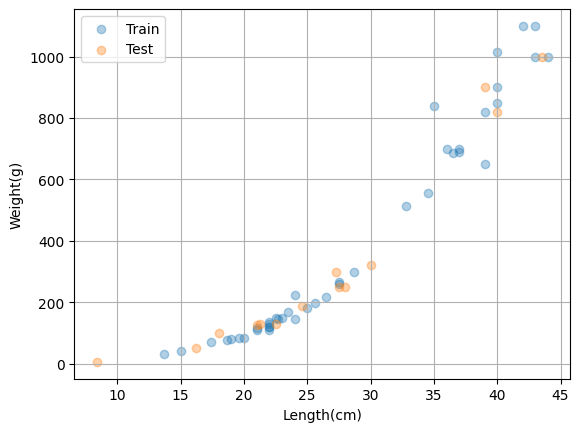

In [27]:
# 훈련 셋 시각화(Weight ~ Length)

plt.scatter(x=X_tr.ravel(),y=y_tr, label='Train', alpha=0.35) # ravel = 뷰, flatten은 원본에서 복사해온 것.
plt.scatter(x=X_te.ravel(),y=y_te, label='Test', alpha=0.35)
plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')

plt.show()

# KNN Regressor 모델을 훈련, 평가.

1. KNN Regressor 객체 생성.
1. KNN Regressor 훈련 셋으로 학습
1. 훈련 셋의 예측값 계산, 실젯값과 비교.
1. 테스트 셋의 예측값 계산, 실젯값과 비교.

In [28]:
knn = KNeighborsRegressor()

In [29]:
knn.fit(X_tr,y_tr)

KNeighborsRegressor()

In [33]:
y_pred_tr = knn.predict(X_tr)

In [35]:
y_pred_tr

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [34]:
y_tr

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [30]:
y_pred = knn.predict(X_te)

In [31]:
y_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [32]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [36]:
np.mean(y_pred==y_te)

0.0

In [37]:
np.mean(y_pred_tr==y_tr)

0.0